# 机器学习之分类算法
分类：
- 逻辑回归
- 神经网络
- 决策树
- 支持向量机


首先，导入实验用的数据

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classifier_1.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

测试集和数据集拆分

In [2]:
from sklearn.model_selection import train_test_split
'''
训练集和测试机数据拆分

输入:
    test_size:测试数据占比

返回
    X_train：训练输入数据
    X_test： 测试输入数据
    y_train：训练标签
    y_test： 测试标签
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.25,
    random_state=42
)

## 逻辑回归

定义分类器并将分类器和数据拟合

In [63]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 决策树

In [60]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier()
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()

### 支持向量机
```
SVC(kernel = 'rbf', gamma = 200, degree = None, C = None)
```
- kernel：linear (线性)， poly（多项式）, rbf（高斯核）
- degree：多项式内核的次数（如果选择了多项式内核）
- gamma ：γ 参数
- C：C参数

In [7]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
'''
在测试集上进行数据拟合
'''
classifier.fit(X_train, y_train)

'''
预测
'''
y_pred = classifier.predict(X_test)

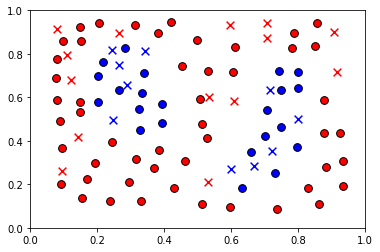

In [66]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

'''
绘制训练集和测试集的结果
'''
plt.scatter(X_train[np.argwhere(y_train==0).flatten(),0], X_train[np.argwhere(y_train==0).flatten(),1], 
            s = 60, color = 'blue', edgecolor = 'k', marker = "o")
plt.scatter(X_train[np.argwhere(y_train==1).flatten(),0], X_train[np.argwhere(y_train==1).flatten(),1], 
            s = 60, color = 'red', edgecolor = 'k', marker = "o")

plt.scatter(X_test[np.argwhere(y_test==0).flatten(),0], X_test[np.argwhere(y_test==0).flatten(),1], 
            s = 60, color = 'blue', edgecolor = 'k', marker="x")
plt.scatter(X_test[np.argwhere(y_test==1).flatten(),0], X_test[np.argwhere(y_test==1).flatten(),1], 
            s= 60, color = 'red', edgecolor = 'k', marker="x")

x_min = math.floor(min(X.min(), X_test.min()))
x_max = math.ceil(max(X.max(), X_test.max()))
y_min = math.floor(min(y.min(), y_test.min()))
y_max = math.ceil(max(y.max(), y_test.max()))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(False)
plt.tick_params(
        axis='x',
        which='both',
        bottom=True,
        top=False)
plt.show()

评估指标**准确率**计算

In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

0.9166666666666666

### 模型选择

#### 学习曲线

In [16]:
data.shape

(96, 3)